In [6]:
import matplotlib.pyplot as plt
import seaborn as sns	
import pandas as pd
import numpy as np

# On measurement methods
TensorFlow does not allow the user to create CUDA Events which can be used to synchronize GPU threads and thus make 
processing time measurements more accurate.  
Here I tested the difference between measurements with and without synchronization.

In [7]:
data = pd.read_csv('../results/pytorch_events_vs_perfcount.csv')

data = data.drop(columns=['loss', 'performance'])
data['difference'] = data.elapsed_time_cuda - data.elapsed_time_perf
data['difference_ms'] = data.difference / 1000000

training = data[data['type'] == 'training'].drop(columns=['type'])
evaluation = data[data['type'] != 'training'].drop(columns=['type', 'epoch'])

Text(0.5, 1.0, 'evaluation')

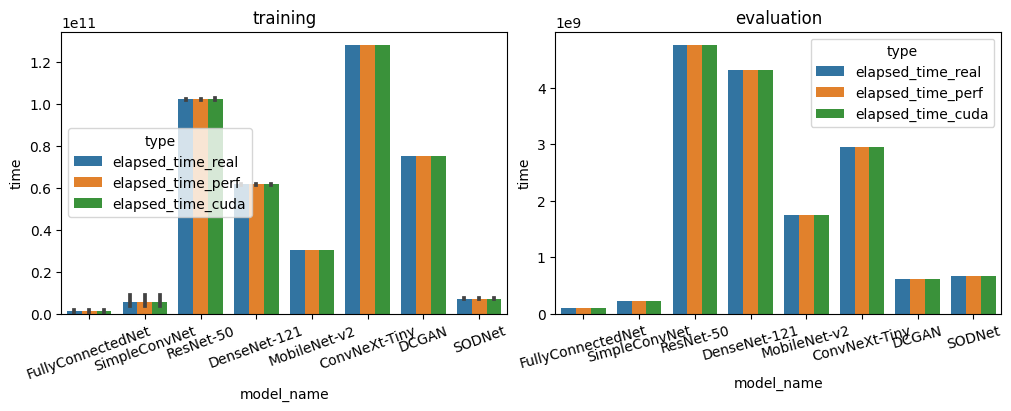

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

train_melted = training.melt(
	id_vars=['model_name'],
	value_vars=['elapsed_time_real', 'elapsed_time_perf', 'elapsed_time_cuda'],
	var_name='type',
	value_name='time'
)

sns.barplot(data=train_melted, x='model_name', y='time', hue='type', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20)
axes[0].set_title('training')

evals_melted = evaluation.melt(
	id_vars=['model_name'],
	value_vars=['elapsed_time_real', 'elapsed_time_perf', 'elapsed_time_cuda'],
	var_name='type',
	value_name='time'
)

sns.barplot(data=evals_melted, x='model_name', y='time', hue='type', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)
axes[1].set_title('evaluation')

Text(0.5, 1.0, 'evaluation')

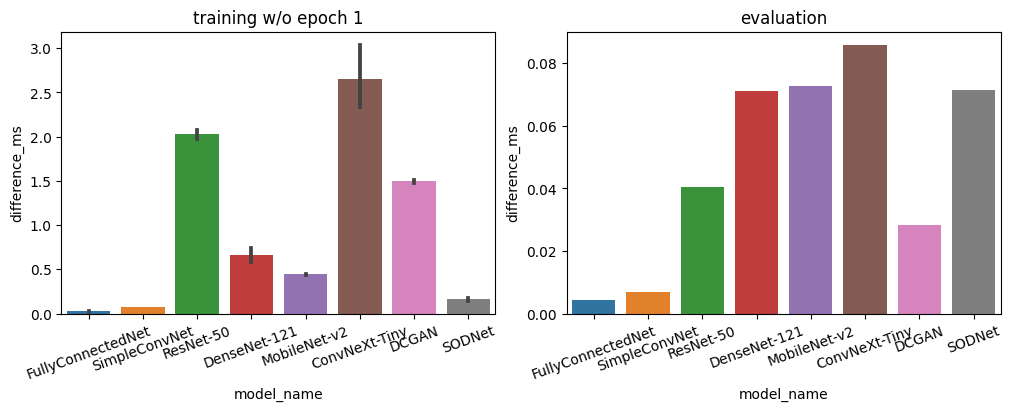

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

epoch = 1
sns.barplot(data=training[training.epoch != epoch], x='model_name', y='difference_ms', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20)
axes[0].set_title(f'training w/o epoch {epoch}')

sns.barplot(data=evaluation, x='model_name', y='difference_ms', ax=axes[1])
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=20)
axes[1].set_title('evaluation')

In [13]:
data_wo_1 = pd.concat([data[(data.epoch != 1)], evaluation], ignore_index=True)
mean_diff = data_wo_1.difference_ms.mean()
std_diff = data_wo_1.difference_ms.std()
max_diff = data_wo_1.difference_ms.max()
min_diff = data_wo_1.difference_ms.min()
range_diff = (max_diff - min_diff) / 2

training_wo_1 = training[training.epoch != 1]
train_mean_diff = training_wo_1.difference_ms.mean()
train_std_diff = training_wo_1.difference_ms.std()
train_max_diff = training_wo_1.difference_ms.max()
train_min_diff = training_wo_1.difference_ms.min()
train_range_diff = (train_max_diff - train_min_diff) / 2

eval_mean_diff = evaluation.difference_ms.mean()
eval_std_diff = evaluation.difference_ms.std()
eval_max_diff = evaluation.difference_ms.max()
eval_min_diff = evaluation.difference_ms.min()
eval_range_diff = (eval_max_diff - eval_min_diff) / 2 

print(f'overall mean difference: {mean_diff:.2f} ± {range_diff:.2f} (std: {std_diff:.2f}, max: {max_diff:.2f}, min: {min_diff:.2f})')
print(f'training mean difference: {train_mean_diff:.2f} ± {train_range_diff:.2f} (std: {train_std_diff:.2f}, max: {train_max_diff:.2f}, min: {train_min_diff:.2f})')
print(f'evaluation mean difference: {eval_mean_diff:.2f} ± {eval_range_diff:.2f} (std: {eval_std_diff:.2f}, max: {eval_max_diff:.2f}, min: {eval_min_diff:.2f})')

overall mean difference: 0.83 ± 1.70 (std: 0.94, max: 3.40, min: 0.00)
training mean difference: 0.94 ± 1.69 (std: 0.96, max: 3.40, min: 0.02)
evaluation mean difference: 0.05 ± 0.04 (std: 0.03, max: 0.09, min: 0.00)
